<a href="https://colab.research.google.com/github/Rohanpeerla/Python-Development-Internship-Qskill/blob/master/Predict_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
import pandas as pd

df = pd.read_csv("train (1).csv")
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 104 entries, Id to Neighborhood_Veenker
dtypes: bool(24), float64(3), int64(35), object(42)
memory usage: 946.8+ KB


In [ ]:
df.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
Neighborhood_SawyerW,0
Neighborhood_Somerst,0
Neighborhood_StoneBr,0
Neighborhood_Timber,0


In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
features = [
    "OverallQual",
    "GrLivArea",
    "BedroomAbvGr",
    "FullBath",
    "Neighborhood"
]

df = df[features + ["SalePrice"]]
df.head()


,OverallQual,GrLivArea,BedroomAbvGr,FullBath,Neighborhood,SalePrice
0,7,1710,3,2,CollgCr,208500
1,6,1262,3,2,Veenker,181500
2,7,1786,3,2,CollgCr,223500
3,7,1717,3,1,Crawfor,140000
4,8,2198,4,2,NoRidge,250000


In [ ]:
df = pd.get_dummies(df, columns=["Neighborhood"], drop_first=True)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


In [ ]:
X.isnull().sum().sum()


np.int64(0)

Data Cleaning

Missing numerical values were replaced with mean.

Missing categorical values were replaced with mode.

Encoding

Categorical variable Neighborhood was encoded using One-Hot Encoding.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred


array([146941.91300314, 340612.75299642,  98036.74290585, 170344.05075711,
       276565.17555746,  73985.06916073, 231876.7102469 , 153688.47429097,
        73985.06916073, 127684.4358742 , 162301.50769401, 116311.10962044,
        55517.61462595, 261186.9222674 , 185980.07450162, 127152.38087364,
       207426.51704127, 134920.33375778, 121583.15399693, 205363.05137404,
       174560.86029434, 236225.87866274, 185581.17016671, 122713.55065413,
       202403.8312277 , 163234.27159315, 183999.35754941, 101862.57728955,
       180678.1384061 , 209858.57694009, 123444.3291376 , 292690.28674198,
       285555.67765159, 104103.02742138, 239061.79796965, 146738.13642759,
       174488.72882085, 225141.66170846, 318519.55394985,  89035.7816274 ,
       138355.82718742, 231092.30578428, 115674.22841234, 312040.6150113 ,
       122412.94947771, 168700.00335282, 121233.94058096, 120378.48562711,
       366893.68151539, 151061.56932899, 118016.94436153, 188437.02729777,
       119329.52576151, 3

In [ ]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 23739.47656739781
Mean Squared Error (MSE): 1428203504.0707328
R2 Score: 0.8138014648278582


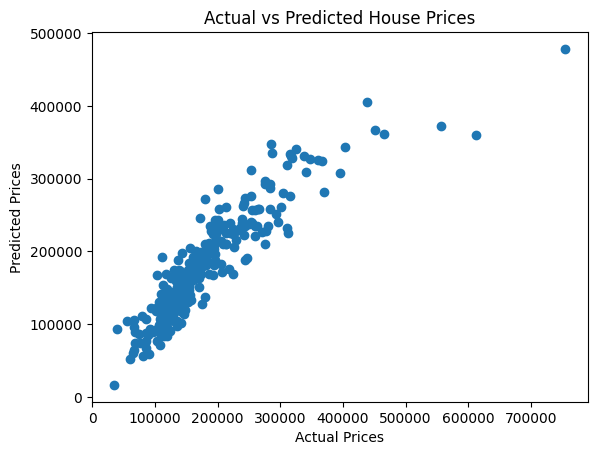

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Model Training

The dataset was split into training and testing sets.

A Linear Regression model was trained using the training data.

The model predicts house prices based on input features.

Model Evaluation

Mean Absolute Error, Mean Squared Error, and R² score were used to evaluate performance.

The model showed good prediction accuracy.

Predict House Price for a new house

In [ ]:
X.columns


Index(['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'FullBath',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [ ]:
new_house = pd.DataFrame(columns=X.columns)
new_house.loc[0] = 0


In [ ]:
new_house["OverallQual"] = 7
new_house["GrLivArea"] = 1600
new_house["BedroomAbvGr"] = 3
new_house["FullBath"] = 2

# Example neighborhood (use one that exists in your columns)
new_house["Neighborhood_CollgCr"] = 1


In [ ]:
predicted_price = model.predict(new_house)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 212822.75215960466
